# Analysis of Palliative Care Twitter Data


## Before we begin

Upload the data folder `tutorial_data.zip` using the "UPLOAD" button under the "Files" tab on the left. This may take a minute or two. 

Once it has been uploaded, run the code below to extract the files. After this code block has run, you should see a `tutorial_data` folder on the left (you may need to click "REFRESH")



In [0]:
!unzip tutorial_data.zip

Archive:  tutorial_data.zip
   creating: tutorial_data/
  inflating: tutorial_data/3_decision_forest.jpeg  
  inflating: tutorial_data/config_palliative_care.json  
  inflating: tutorial_data/1_workflow.png  
  inflating: tutorial_data/annotation_file_for_train_classifier.csv  
  inflating: tutorial_data/4_tfidf.png  
  inflating: tutorial_data/search_pallative.json  
  inflating: tutorial_data/topic_modeling_5000_sample.csv  
  inflating: tutorial_data/6_svm.png  
  inflating: tutorial_data/tweet_topic_ds.csv  
  inflating: tutorial_data/5_svm.png  


## Introduction

Palliative care is specialized medical care for people living with a serious illness. It focuses on relief from the symptoms and stress of that illness. 

Palliative care has been proven to improve patients’ quality-of-life. Nevertheless, lack of awareness and misunderstanding limits its adoption. Research is urgently needed to understand the determinants (e.g., knowledge) related to its adoption. Traditionally, these determinants are measured with questionnaires. In this study, however, we will use NLP to explore Twitter and reveal these determinants. We will also assess the feasibility of extracting user demographics from Twitter data—a significant shortcoming in existing studies that limits our ability to explore more fine-grained research questions (e.g., gender difference). 



## Study workflow


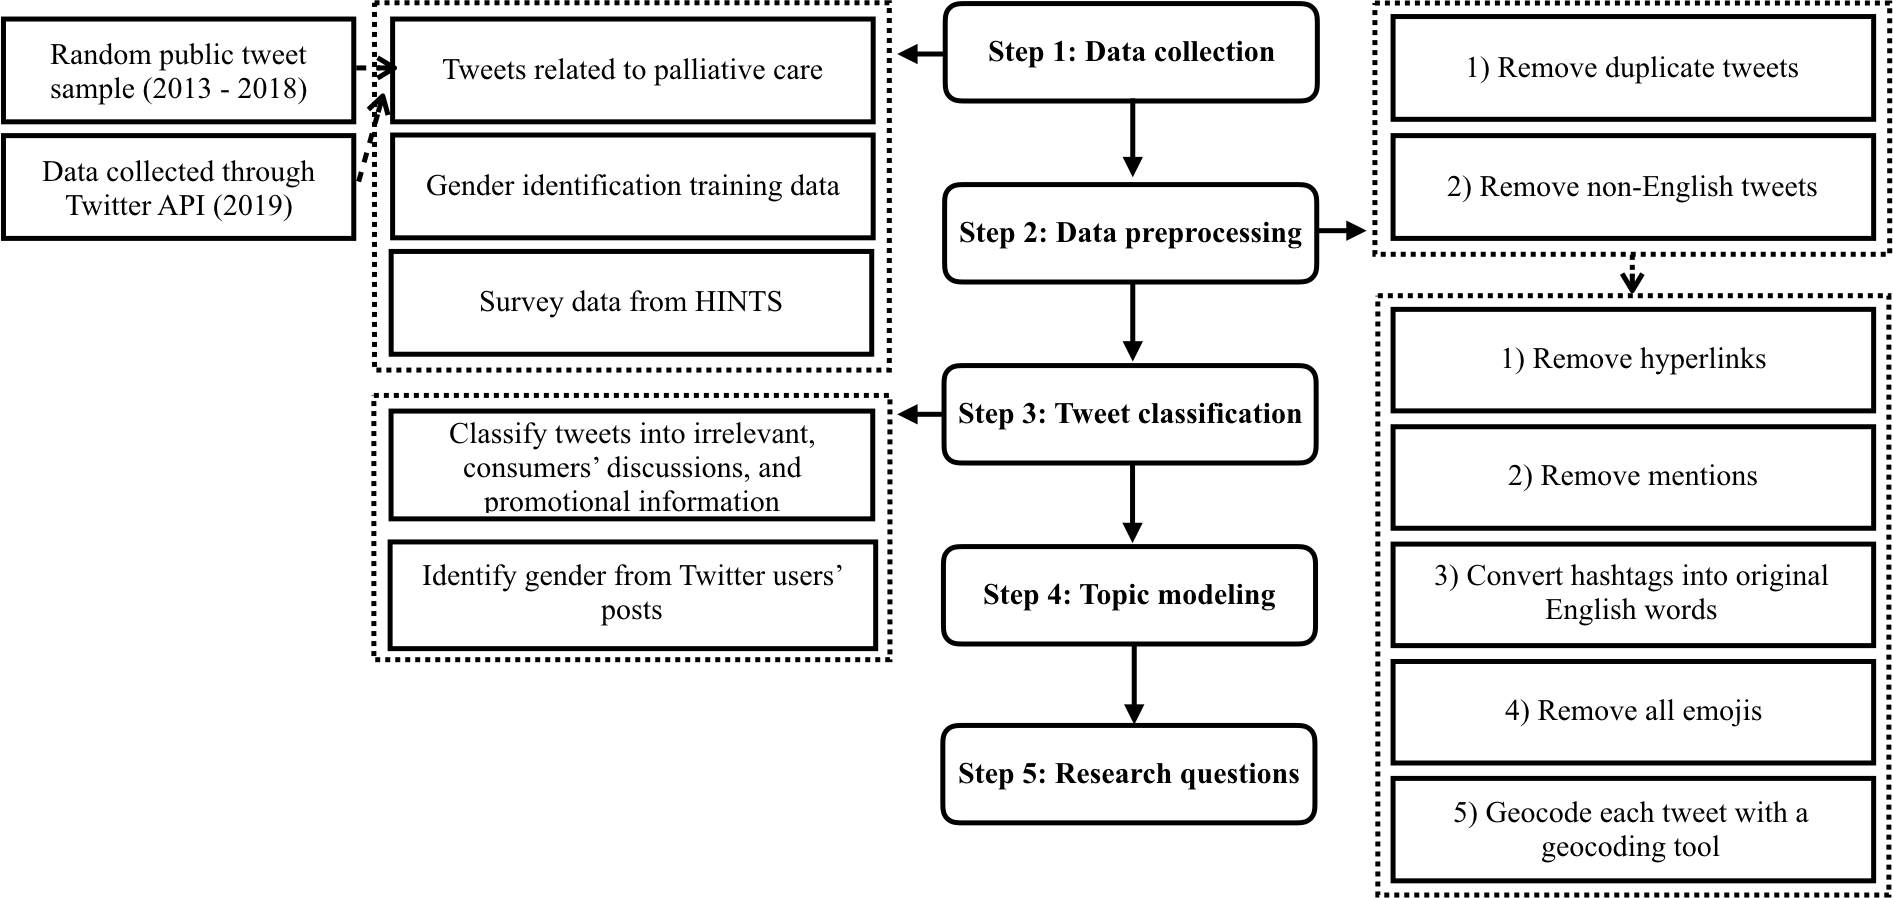

In [0]:
from IPython.display import Image
Image('tutorial_data/1_workflow.png', width=700)

The general process of our approach, as shown in the figure above, is to 

1. collect palliative care-related tweets from 2013 to 2019

2. preprocess the tweets to remove make them more amenable to processing later on

3. build machine learning models to classify tweets into consumers' discussions and promotional information

4. use topic modeling to explore whether the topics present in tweets are comparable to responses of the palliative care related questions in the Health Information National Trends Survey (HINTS).

5. answer the following 3 research questions based on the topic distributions: 

  * What are the commonly discussed topics in promotional information and laypeople discussions on Twitter? Are laypeople’s palliative care discussions on Twitter affected by promotional information? (i.e., through assessing the correlations between promotional palliative care-related information and consumers’ discussions in terms of topic distributions)
  
  * Can the learned topics be mapped to the constructs in the IBM? If so, are the geographic distributions of the learned topics comparable to the determinants measured from HINTS survey? 

  * Can we extract user attributes with an initial focus on gender from laypeople’s Twitter postings? If so, are the geographic distributions of the learned topics comparable to the determinants measured from HINTS survey stratified by gender?

In this tutorial, we will hand on the process of collecting tweets based on keywords, building classifier to filter out irrelevant information, astracting topics from relevant tweets.

# Part 1: Data collection


## Install python3

## Windows
Follow these steps to install Python 3 on Windows.

1. Go to the Python Releases for Windows page (https://www.python.org/downloads/) and download the latest stable release Windows x86-64 executable installer.

2. On the first page of the installer, be sure to select the “Add Python to PATH” option and click through the remaining setup steps leaving all the pre-select installation defaults.

3. Once complete, we can check that Python was installed correctly by opening a Command Prompt (CMD or PowerShell) and entering the command python --version. The latest Python 3.7 version number should print to the console.

## Mac

For Mac we'll install Miniconda, which is a complete Python installation with some helpful libraries preinstalled. Follow these steps to install the latest Miniconda version for Mac.

1. Go to the Miniconda Download page (https://docs.conda.io/en/latest/miniconda.html) and download the Python 3.7 Mac OS X 64-bit `.pkg` installer.

2. After the download is complete, run the installer and click through the setup steps leaving all the pre-selected installation defaults.

3. Once complete, check that Miniconda was installed correctly by opening a Terminal and running the command `conda list`. This should print a list of packages included with Miniconda.

## Your first Python script

Now that we have a working Python installation, let’s try out our new development environment by writing and executing our first script.

1. Open a Terminal (if on Mac) or Command Prompt (if on Windows) and browse to a directory of your choice.
2. Create a new file called mycode.py and open it with your favorite text editor.
3. Copy and paste the following code and save the file.
~~~
print("I'm running Python code on my own environment!")
~~~
4. Finally, run the script by executing the following command from the Terminal/Command Prompt in the folder where the file was saved.
~~~
python mycode.py
~~~
5. Our console should print the following message
~~~
I'm running Python code on my own environment!.
~~~
6. That’s it! We just ran Python code on our own personal environment.


## install tweets crawler
Tweets were crawled with *tweetf0rm* a Python tool we developed, which can access the Twitter Application Program Interface (API) and collect targeted Twitter data based on a list of keywords
### installation
None... just clone this and start using it.

~~~
git clone git://github.com/bianjiang/tweetf0rm.git
~~~
### Dependencies
~~~
pip install -r requirements.txt
~~~


## Develop keywords and start to collect tweets
### keywords
The list of keywords was developed through a snowball sampling process, where we started with a list of obvious seed keywords collected from online information sites relevant to palliative care (e.g. #palliativecare and #palliative). We then iteratively queried our collection of historical public random tweets (i.e. collected through Twitter streaming API) and (b) Twitter’s own web search interface (i.e. https://twitter.com/search-home?lang=en), and manually reviewed randomly selected sample tweets to discover new SGM-related keywords (i.e. that co-occur with one of the existing keywords, but were not in the existing keyword list) until no new keywords were found.

### Run crawler based on the list of keywords

`config_palliative_care.json` and `search_palliative_care.json` are in the `tutorial_data` folder you downloaded earlier.

~~~
python twitter_tracker.py -cmd search -c ./config_palliative_care.json -cc ./search_pallative.json -o ../palliative_care_data/ 
~~~
  In general,
  * `-c`: the config file for Twitter API keys
  * `-o`: the output folder (where you want to hold your data)
  * `-cmd`: the command you want to run
  * `-cc`: the config file for the command (each command often needs different config files, see examples below)
  * `-wait`: wait `x` secs between calls (only in REST API access)

### example of a raw tweet
~~~
{
  "created_at": "Tue May 21 04:40:03 +0000 2019",
  "id": 1130694723155374080,
  "id_str": "1130694723155374080",
  "full_text": "Yahoo Poll: Do you think Singapore hospitals should improve their palliative care standards? https://t.co/enXtJFvU59 :Auto pickup by wikyou",
  "truncated": false,
  "display_text_range": [
    0,
    139
  ],
  "entities": {
    "hashtags": [],
    "symbols": [],
    "user_mentions": [],
    "urls": [
      {
        "url": "https://t.co/enXtJFvU59",
        "expanded_url": "http://tinyurl.com/y6xbh3qa",
        "display_url": "tinyurl.com/y6xbh3qa",
        "indices": [
          93,
          116
        ]
      }
    ]
  },
  "metadata": {
    "iso_language_code": "en",
    "result_type": "recent"
  },
  "source": "<a href=\"http://wikyou.org.uk\" rel=\"nofollow\">SingaporeNewsSG_autopost2</a>",
  "in_reply_to_status_id": null,
  "in_reply_to_status_id_str": null,
  "in_reply_to_user_id": null,
  "in_reply_to_user_id_str": null,
  "in_reply_to_screen_name": null,
  "user": {
    "id": 350584364,
    "id_str": "350584364",
    "name": "SingaporeNewsSG",
    "screen_name": "SingaporeNewsSG",
    "location": "JAPAN",
    "description": "SINGAPORE » Singapore Business BUSINESS » Business Economy Stocks Personal Finance TECHNOLOGY » Technology Internet Gadgets Social Media ENTERTAINMENT » Enterta",
    "url": "http://t.co/RIUrKvjaKz",
    "entities": {
      "url": {
        "urls": [
          {
            "url": "http://t.co/RIUrKvjaKz",
            "expanded_url": "http://wikyou.net/forMA8/",
            "display_url": "wikyou.net/forMA8/",
            "indices": [
              0,
              22
            ]
          }
        ]
      },
      "description": {
        "urls": []
      }
    },
    "protected": false,
    "followers_count": 4251,
    "friends_count": 4642,
    "listed_count": 75,
    "created_at": "Mon Aug 08 00:48:55 +0000 2011",
    "favourites_count": 0,
    "utc_offset": null,
    "time_zone": null,
    "geo_enabled": false,
    "verified": false,
    "statuses_count": 85324,
    "lang": "ja",
    "contributors_enabled": false,
    "is_translator": false,
    "is_translation_enabled": false,
    "profile_background_color": "000000",
    "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png",
    "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png",
    "profile_background_tile": false,
    "profile_image_url": "http://pbs.twimg.com/profile_images/951380323954188288/0UrU5YsP_normal.jpg",
    "profile_image_url_https": "https://pbs.twimg.com/profile_images/951380323954188288/0UrU5YsP_normal.jpg",
    "profile_banner_url": "https://pbs.twimg.com/profile_banners/350584364/1515661708",
    "profile_link_color": "E81C4F",
    "profile_sidebar_border_color": "000000",
    "profile_sidebar_fill_color": "000000",
    "profile_text_color": "000000",
    "profile_use_background_image": false,
    "has_extended_profile": false,
    "default_profile": false,
    "default_profile_image": false,
    "following": null,
    "follow_request_sent": null,
    "notifications": null,
    "translator_type": "none"
  },
  "geo": null,
  "coordinates": null,
  "place": null,
  "contributors": null,
  "is_quote_status": false,
  "retweet_count": 0,
  "favorite_count": 0,
  "favorited": false,
  "retweeted": false,
  "possibly_sensitive": false,
  "lang": "en"
}
~~~


# Part 2: Develop Machine Learning (ML) Classifiers


A big part of machine learning is classification — we want to know what class (a.k.a. group) an observation belongs to. The ability to precisely classify observations is extremely valuable for various business applications like predicting whether a particular user will buy a product or forecasting whether a given loan will default or not.

There are a number of classification algorithms; to many to discuss here. Some examples are logistic regression, support vector machines (SVM), naive Bayes classifier, and decision trees.

Here we will use decision trees (and an extension to decision trees called a random forest) as well as SVMs to address our classification tasks. As a reminder, we're going to classify tweets into a) *consumers' discussions* or b) *promotional information*


## Decision Trees

Here we will examine how basic decision trees work, how individual decisions trees are combined to make a random forest, and ultimately discover why random forests are so good at what they do.

First, let’s  go over decision trees. Fortunately, they are pretty intuitive. I’d be willing to bet that most people have used a decision tree, knowingly or not, at some point in their lives.

A decision tree essentially asks a series of *yes - no* questions about a given example. The predicted class of the example is determined by the answers to these questions.

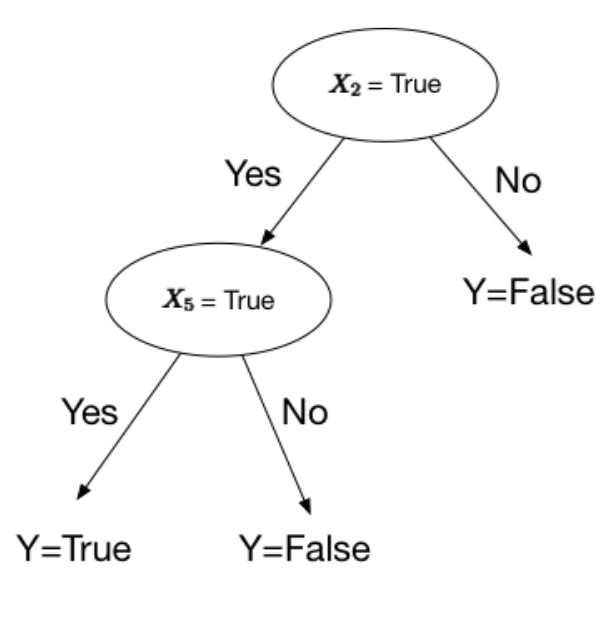

In [0]:
Image('tutorial_data/2_decision_tree.jpeg', width=400)

It’s probably much easier to understand how a decision tree works through an example.

Imagine that our dataset consists of the numbers at the top of the figure to the left. We have two 1s and five 0s (1s and 0s are our classes) and desire to separate the classes using their features. The features are color (red vs. blue) and whether the observation is underlined or not. So how can we do this?
Color seems like a pretty obvious feature to split by as all but one of the 0s are blue. So we can use the question, “Is it red?” to split our first node. You can think of a node in a tree as the point where the path splits into two — observations that meet the criteria go down the Yes branch and ones that don’t go down the No branch.

The No branch (the blues) is all 0s now so we are done there, but our Yes branch can still be split further. Now we can use the second feature and ask, “Is it underlined?” to make a second split.

The two 1s that are underlined go down the Yes subbranch and the 0 that is not underlined goes down the right subbranch and we are all done. Our decision tree was able to use the two features to split up the data perfectly. Victory!
Obviously in real life our data will not be this clean but the logic that a decision tree employs remains the same. At each node, it will ask —

What feature will allow me to split the observations at hand in a way that the resulting groups are as different from each other as possible (and the members of each resulting subgroup are as similar to each other as possible)?

### The Random Forest Classifier
Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction (see figure below).

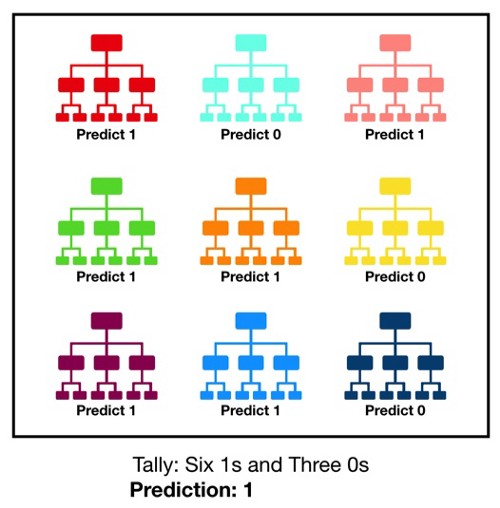

In [0]:
Image('tutorial_data/3_decision_forest.jpeg', width=400)

The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds. In data science speak, the reason that the random forest model works so well is:

A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

The low correlation between models is the key. Just like how investments with low correlations (like stocks and bonds) come together to form a portfolio that is greater than the sum of its parts, uncorrelated models can produce ensemble predictions that are more accurate than any of the individual predictions. The reason for this wonderful effect is that the trees protect each other from their individual errors (as long as they don’t constantly all err in the same direction). While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction. So the prerequisites for random forest to perform well are:

1. There needs to be some actual signal in our features so that models built using those features do better than random guessing.
2. The predictions (and therefore the errors) made by the individual trees need to have low correlations with each other.


###Import packages

In [0]:
import sklearn # scikit-learn for machine learning
import numpy as np  # Fast numerical operations
import pandas as pd  # Quick and easy data handling. Similar to R.

from matplotlib import pyplot as plt  # Plotting
from sklearn.metrics import classification_report # Evaluation

###Load annotated Twitter data


This part uses `annotation_file_for_train_classifier.csv`, which contains tweets and their manually assigned labels. These labels are

* **0**: not related to palliative care
* **1**: promotional information
* **2**: consumers' discussions

It's always a good idea to do a quick manual check of your data before doing anything with it. 

In [0]:
twitter_palliative_care_df = pd.read_csv('tutorial_data/annotation_file_for_train_classifier.csv')
twitter_palliative_care_df.head()

,label,text,clean_text
0,0,Bilingual Lvn Palliative Care Clinic San Anton...,Bilingual Lvn Palliative Care Clinic San Anton...
1,1,Palliative Care drop in session tomorrow 27th ...,Palliative Care drop in session tomorrow 27th ...
2,0,American Thoracic Society Guidelines for Pedia...,American Thoracic Society Guidelines for Pedia...
3,0,- The Kauai Hospice is hosting the Society of ...,- The Kauai Hospice is hosting the Society of ...
4,1,X Factor winner's single proceeds to support S...,X Factor winner's single proceeds to support S...


In [0]:
print(twitter_palliative_care_df.shape)  # Number of rows, Number of columns
print(twitter_palliative_care_df["label"].unique())  # Make sure the labels match what we expect

(1839, 3)
[0 1 2]


In [0]:
# In this task, we only focused on relevant and irrelevant classification.
#   Thus we transfer label 2 (consumer discussions) into label 1 (relevant)
def pre_annotation_label(row):
    if row['label'] == 2:
        return 1
    else:
      return row['label']

twitter_palliative_care_df['label'] = twitter_palliative_care_df.apply(pre_annotation_label, axis=1)

# make sure the text field is string format
def trans_row(row):
    return str(row['text'])

twitter_palliative_care_df['text'] = twitter_palliative_care_df.apply(trans_row, axis=1)

texts = twitter_palliative_care_df['text'].tolist()
labels = twitter_palliative_care_df['label'].tolist()

# Again, it's always a good idea to visually inspect your data
print(labels[:5])
print(texts[0])
# Make sure we have the same number of labels as tweets
print(len(texts))
print(len(labels))

[0, 1, 0, 0, 1]
Bilingual Lvn Palliative Care Clinic San Antonio Tx Jobs in San Antonio, TX #SanAntonio #TX #jobs #jobsearch https://t.co/Lj3zCoSWod
1839
1839


###Train-test split
The classifier will be trained on 80% of annotated tweets. The remaining 20% will be used for evaluation.

We stratify this split on the labels to ensure that each label is equally represented within the training and evaluation data.


In [0]:
from sklearn import model_selection

train_x, test_x, train_y, test_y = model_selection.train_test_split(texts,
                                                                    labels,
                                                                    stratify=labels,
                                                                    test_size=0.2,
                                                                    random_state=42)    
# We'll convert the labels into numpy arrays to make things run a little faster.
train_y = np.array(train_y)
test_y = np.array(test_y)
print(train_y[:3])

pickle.dump((train_x, test_x), open("train_test_x.pickle", 'wb'))

[1 1 1]


###Bag of Words (BOW)
We make the list of unique words in the text corpus called vocabulary. Then we can represent each sentence or document as a vector with each word represented as 1 for present and 0 for absent from the vocabulary. Another representation can be count the number of times each word appears in a document. The most popular approach is using the Term Frequency-Inverse Document Frequency (TF-IDF) technique.
1. Term Frequency (TF) = (Number of times term t appears in a document)/(Number of terms in the document)
2. Inverse Document Frequency (IDF) = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in. The IDF of a rare word is high, whereas the IDF of a frequent word is likely to be low. Thus having the effect of highlighting words that are distinct.
3. We calculate TF-IDF value of a term as = TF * IDF


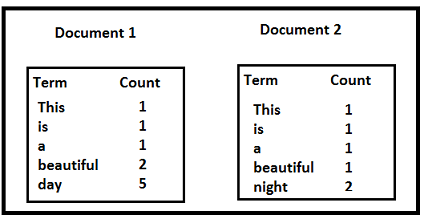

In [0]:
Image('tutorial_data/4_tfidf.png', width=600)

Let us take an example to calculate TF-IDF of a term in a document.

~~~
TF('beautiful',Document1) = 2/10, IDF('beautiful')=log(2/2) = 0
TF(‘day’,Document1) = 5/10,  IDF(‘day’)=log(2/1) = 0.30

TF-IDF(‘beautiful’, Document1) = (2/10)*0 = 0
TF-IDF(‘day’, Document1) = (5/10)*0.30 = 0.15
~~~
As, you can see for Document1 , TF-IDF method heavily penalizes the word ‘beautiful’ but assigns greater weight to ‘day’. This is due to IDF part, which gives more weightage to the words that are distinct. In other words, ‘day’ is an important word for Document1 from the context of the entire corpus. Python scikit-learn library provides efficient tools for text data mining and provides functions to calculate TF-IDF of text vocabulary given a text corpus.


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

# transfer tweets into TF-IDF features
# scikit-learn has a handy function for doing this

tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=500)
tfidf_vect_ngram.fit(texts)
xtest_ngram = tfidf_vect_ngram.transform(test_x)
xtrain_ngram = tfidf_vect_ngram.transform(train_x)
print(train_x[0])
print(xtrain_ngram[0])

pickle.dump((xtest_ngram, xtrain_ngram, test_y, train_y),
            open("data.pickle", 'wb'))

@skipbidder For two reasons. The first is that many (not all) non-palliative care docs trivialize symptom management to the detriment of not only their patients' quality of life...3/n
  (0, 460)	0.4812916981870509
  (0, 373)	0.5534776367869542
  (0, 372)	0.5415531423270393
  (0, 343)	0.22428900631010004
  (0, 318)	0.3441445081896422


### Train random forest classifier & test performance
A random forest consists of multiple random decision trees. Two types of randomnesses are built into the trees. First, each tree is built on a random sample from the original data. Second, at each tree node, a subset of features are randomly selected to generate the best split.



In [0]:
from sklearn import decomposition, ensemble
from sklearn.metrics import precision_recall_fscore_support

# initialize random forest classifier 
rf_model = ensemble.RandomForestClassifier(n_estimators=10)
# train random forest classifier
rf_model.fit(xtrain_ngram, train_y)
# predict on test dataset
predict_labels = rf_model.predict(xtest_ngram)
# measure performance
prec, rec, f, _ = precision_recall_fscore_support(test_y, predict_labels, average='weighted')

print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-Score: {f:.2f}")

Precision: 0.71
Recall: 0.73
F1-Score: 0.72


## 2.Support Vector Machine

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.


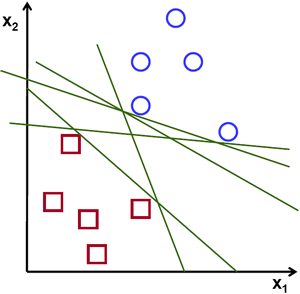

In [0]:
Image('tutorial_data/5_svm.png', width=400)

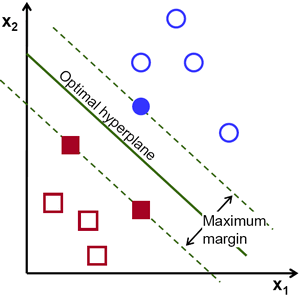

In [0]:
Image('tutorial_data/6_svm.png', width=400)

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

In [0]:
from sklearn.svm import SVC

# initialize SVM classifier 
svm_clf = SVC(gamma='auto', kernel='linear')
# train SVM classifier
svm_clf.fit(xtrain_ngram, train_y)
# predict on test dataset
predict_labels = svm_clf.predict(xtest_ngram)
# measure performance
prec, rec, f, _ = precision_recall_fscore_support(test_y, predict_labels, average='weighted')

print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-Score: {f:.2f}")

Precision: 0.74
Recall: 0.77
F1-Score: 0.72


##3\. Neural network classifier
Deep learning is an artificial intelligence function that imitates the workings of the human brain in processing data and creating patterns for use in decision making. Deep learning is a subset of machine learning in artificial intelligence (AI) that has networks capable of learning unsupervised from data that is unstructured or unlabeled. Also known as deep neural learning or deep neural network.

### import packages


In [0]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_recall_fscore_support

from matplotlib import pyplot as plt
from IPython.display import clear_output
from sklearn.metrics import classification_report
import keras
from keras.models import load_model
import xgboost, numpy, string, pandas
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
import pandas as pd
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
import pickle
import sklearn

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### Transfer text to vectors (GloVe)
Word2vec takes as its input a large corpus of text and produces a vector space with each unique word being assigned a corresponding vector in the space. Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space. Word2Vec is very famous at capturing meaning and demonstrating it on tasks like calculating analogy questions of the form a is to b as c is to ?. For example, man is to woman as uncle is to ? (aunt) using a simple vector offset method based on cosine distance. For example, here are vector offsets for three word pairs illustrating the gender relation:



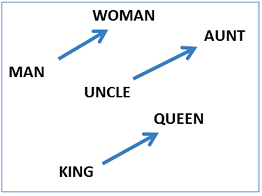

This kind of vector composition also lets us answer “King — Man + Woman = ?” question and arrive at the result “Queen” ! All of which is truly remarkable when you think that all of this knowledge simply comes from looking at lots of word in context with no other information provided about their semantics.

### GloVe
The Global Vectors for Word Representation, or GloVe, algorithm is an extension to the word2vec method for efficiently learning word vectors. GloVe constructs an explicit word-context or word co-occurrence matrix using statistics across the whole text corpus. The result is a learning model that may result in generally better word embeddings.
Consider the following example:
[IMAGE]

1. Target words: ice, steam
2. Probe words: solid, gas, water, fashion 

Let P(k|w) be the probability that the word k appears in the context of word w. Consider a word strongly related to ice, but not to steam, such as solid. P(solid | ice) will be relatively high, and P(solid | steam) will be relatively low. Thus the ratio of P(solid | ice) / P(solid | steam) will be large. If we take a word such as gas that is related to steam but not to ice, the ratio of P(gas | ice) / P(gas | steam) will instead be small. For a word related to both ice and steam, such as water we expect the ratio to be close to one. Refer here for more details.

*** upload 'glove.twitter.27B.100d.txt' ***

In [0]:
from google.colab import files
uploaded_ = files.upload()

In [0]:
import pickle
lookup = pickle.load(open('/content/drive/My Drive/glove25d.pickle', 'rb'))
print(lookup["<user>"])

[ 0.62415   0.62476  -0.082335  0.20101  -0.13741  -0.11431   0.77909
  2.6356   -0.46351   0.57465  -0.024888 -0.015466 -2.9696   -0.49876
  0.095034 -0.94879  -0.017336 -0.86349  -1.3348    0.046811  0.36999
 -0.57663  -0.48469   0.40078   0.75345 ]


In [0]:
def word_embedding(train_x, test_x, trainDF):
    # load the pre-trained word-embedding vectors 
    embeddings_index = {}
    for i, line in enumerate(open('glove.twitter.27B.100d.txt')):
        values = line.split()
        embeddings_index[values[0]] = np.asarray(values[1:], dtype='float32')

    # create a tokenizer 
    token = text.Tokenizer()
    token.fit_on_texts(trainDF)
    word_index = token.word_index

    # convert text to sequence of tokens and pad them to ensure equal length vectors 
    train_seq_x = sequence.pad_sequences(token.texts_to_sequences(train_x), maxlen=500)
    valid_seq_x = sequence.pad_sequences(token.texts_to_sequences(test_x), maxlen=500)

    # create token-embedding mapping
    embedding_matrix = numpy.zeros((len(word_index) + 1, 100))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    return train_seq_x, valid_seq_x, embedding_matrix, word_index

In [0]:
train_seq_x, valid_seq_x, embedding_matrix, word_index = word_embedding(train_x, test_x, trainDF)

NameError: ignored

### Build CNN model


In [0]:
def create_cnn(embedding_matrix=None, word_index=None, optimizer='rmsprop'):
    # Add an Input Layer
    input_layer = layers.Input((numpy.size(train_x, 1), ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 100, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the convolutional Layer
    conv_layer = layers.Convolution1D(100, 3, activation="relu")(embedding_layer)

    # Add the pooling Layer
    pooling_layer = layers.GlobalMaxPool1D()(conv_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(64, activation="relu")(pooling_layer)
    output_layer1 = layers.Dropout(0.2)(output_layer1)
    output_layer2 = layers.Dense(1, activation="softmax")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model
  
## option 2 use n-gram feature
def create_model_architecture(optimizer='rmsprop'):
    # create input layer 
    input_layer = layers.Input((numpy.size(xtest_ngram, 1), ), sparse=True)

    # create hidden layer
    hidden_layer = layers.Dense(50, activation="relu")(input_layer)

    # create output layer
    output_layer = layers.Dense(1, activation="sigmoid")(hidden_layer)

    classifier = models.Model(inputs = input_layer, outputs = output_layer)
    classifier.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    return classifier

In [0]:
CNN_model = create_model_architecture(optimizer='rmsprop')
print(CNN_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        (None, 500)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 50)                25050     
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 51        
Total params: 25,101
Trainable params: 25,101
Non-trainable params: 0
_________________________________________________________________
None


### Train model & evaluate 


In [0]:
np.random.seed(10)
CNN_model.fit(xtrain_ngram, 
              train_y, 
              epochs=10, 
              batch_size=32,
              validation_data=(xtest_ngram, test_y))

Train on 1471 samples, validate on 368 samples
Epoch 1/10
1471/1471 [==============================] - 2s 1ms/step - loss: 0.6436 - acc: 0.7356 - val_loss: 0.5918 - val_acc: 0.7609
Epoch 2/10
1471/1471 [==============================] - 0s 98us/step - loss: 0.5548 - acc: 0.7593 - val_loss: 0.5298 - val_acc: 0.7609
Epoch 3/10
1471/1471 [==============================] - 0s 95us/step - loss: 0.5080 - acc: 0.7634 - val_loss: 0.5083 - val_acc: 0.7663
Epoch 4/10
1471/1471 [==============================] - 0s 94us/step - loss: 0.4810 - acc: 0.7709 - val_loss: 0.4939 - val_acc: 0.7717
Epoch 5/10
1471/1471 [==============================] - 0s 98us/step - loss: 0.4563 - acc: 0.7770 - val_loss: 0.4836 - val_acc: 0.7745
Epoch 6/10
1471/1471 [==============================] - 0s 97us/step - loss: 0.4333 - acc: 0.7825 - val_loss: 0.4801 - val_acc: 0.7853
Epoch 7/10
1471/1471 [==============================] - 0s 96us/step - loss: 0.4125 - acc: 0.7974 - val_loss: 0.4810 - val_acc: 0.7908
Epoch 8/1

In [0]:
scores = CNN_model.predict(xtest_ngram)
predictions = (scores > 0.5).astype(np.int).ravel()
prec, rec, f, _ = precision_recall_fscore_support(test_y, predictions, average='weighted')

print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-Score: {f:.2f}")

Precision: 0.76
Recall: 0.78
F1-Score: 0.76


# Part 3 Topic modeling
Topic modeling is type of statistical modeling for discovering the abstract "topics" that occur in a collection of documents.  Latent Dirichlet Allocation (LDA) is an example of topic model and is used to classify text in a document to a particular topic.  It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.

Here we are going to apply LDA to a set of tweets and visualize topics into worldclouds.



## The Data
The data set we'll use is a list of relevant' tweets.


*** upload 'topic_modeling_5000_sample.csv' file ***

In [0]:
from google.colab import files
uploaded_ = files.upload()

Saving topic_modeling_5000_sample.csv to topic_modeling_5000_sample.csv


In [0]:
import pandas as pd
data = pd.read_csv('tutorial_data/topic_modeling_5000_sample.csv', error_bad_lines=False)
documents = data[['tweets']]

Take a peek of the data

In [0]:
documents[:5]

,tweets
0,RT :Providing care can take an emotional toll....
1,RT :Places still available to join us on 12 Ma...
2,@StephDyhrberg Thank you! It was such a great ...
3,"""My mum was struggling for breath and not a nu..."
4,Palliative Care patients need much better - Wa...


## Data Pre-processing
We will perform the following steps:

1.   Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
2.   Words that have fewer than 3 characters are removed.
3.   All stopwords are removed.
4.   Words are lemmatized — words in third person are changed to first person and verbs in past and future tenses are changed into present.
5.   Words are stemmed — words are reduced to their root form.

Loading gensim and nltk libraries


In [0]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Write a function to perform lemmatize and stem preprocessing steps on the data set.

In [0]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

care_stopwords = ["care", "hospice", "palliative", "palliativecare", "https"]

def preprocess(text):
  
  stemmer = PorterStemmer()
  
  def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
  
  result = []
  for token in simple_preprocess(text):
      if token not in STOPWORDS and token not in care_stopwords and len(token) > 3:
        #result.append(lemmatize_stemming(token))
        result.append(token)
  return result

Select a document to preview after preprocessing.

In [0]:
doc_sample = documents.iloc[400]["tweets"]
print('original document: ')
print(doc_sample)

print('\n\ntokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
RT :International team of #hpm #careeol experts meet in Amsterdam today for start of new EU Horizon 2020 funded project Palliative Sedation @EAPC_CEO @IOELC @NancyPreston16 @jhasselaar @ccentenocortes https://t.co/HyVOtf6puP


tokenized and lemmatized document: 
['international', 'team', 'careeol', 'experts', 'meet', 'amsterdam', 'today', 'start', 'horizon', 'funded', 'project', 'sedation', 'eapc_ceo', 'ioelc', 'nancypreston', 'jhasselaar', 'ccentenocortes', 'hyvotf']


Preprocess the tweets saving the results as ‘processed_docs’


In [0]:
# Make sure the tweets are of the string data type.
documents.loc[:, 'tweets'] = documents['tweets'].astype(str)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [0]:
processed_docs = documents['tweets'].map(preprocess)
processed_docs[:10]

0    [providing, emotional, toll, study, finds, sta...
1    [places, available, join, march, quarterly, ca...
2    [stephdyhrberg, thank, great, evening, huge, a...
3    [struggling, breath, nurse, sight, misdiagnosi...
4    [patients, need, better, wantirna, health, inp...
5    [chemo, active, treatment, mean, inactive, tre...
6    [struggling, breath, nurse, sight, misdiagnosi...
7    [patients, need, better, wantirna, health, inp...
8    [conducted, study, showing, advanced, cancer, ...
9    [conducted, study, showing, advanced, cancer, ...
Name: tweets, dtype: object

## Bag of Words on the Data set
Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

In [0]:
from gensim.corpora import Dictionary

dictionary = Dictionary(processed_docs)
for k, v in list(dictionary.iteritems())[:11]:
    print(k, v)
   
# For example, let's get the number of times the word 'care' occurs
print("\n'charity':", dictionary.dfs[dictionary.token2id['charity']])

0 burnout
1 deaths
2 emotional
3 exhaustion
4 experienced
5 fewer
6 finds
7 higher
8 long
9 providing
10 reported

'charity': 132


### Gensim filter_extremes
Filter out tokens that appear in
1.  less than 15 documents or
2.  more than half of the documents
3.  after the above two steps, keep only the first 100000 most frequent tokens.

In [0]:
print(len(dictionary))
dictionary.filter_extremes(no_below=15, no_above=0.8)
print(len(dictionary))

11845
987


### Gensim doc2bow
For each document we create a dictionary reporting how many
words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier.


In [0]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(161, 2), (473, 1), (646, 1), (724, 2)]

Preview Bag Of Words for our sample preprocessed document.


In [0]:
print(documents['tweets'].loc[4310])
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time(s).".format(bow_doc_4310[i][0], 
                                                        dictionary[bow_doc_4310[i][0]], 
                                                        bow_doc_4310[i][1]))

Shopping at Asda Dewsbury? Make sure you put your tokens in for the Mayor's Appeal. It's  2 4 1 !  Support the Mayor's Appeal and you support both Kirkwood Hospice and the local RSPCA!
Word 161 ("started") appears 2 time(s).
Word 473 ("nurses") appears 1 time(s).
Word 646 ("management") appears 1 time(s).
Word 724 ("joappleby") appears 2 time(s).


## Running LDA using Bag of Words
Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

In [0]:
models = {}
for k in range(2, 10):
  m = gensim.models.LdaMulticore(bow_corpus, num_topics=k,
                                 id2word=dictionary, passes=2, workers=2)
  models[k] = m  

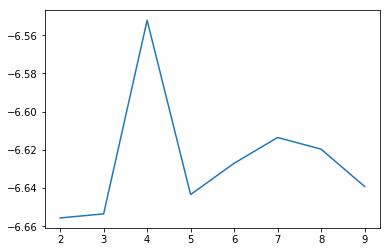

In [0]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

perps = [m.log_perplexity(bow_corpus) for m in models.values()]
  
plt.plot(models.keys(), perps)
plt.show()

In [0]:
lda_model = models[5]

For each topic, we will explore the words occuring in that topic and its relative weight.

In [0]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.030*"support" + 0.017*"life" + 0.013*"people" + 0.013*"money" + 0.013*"local" + 0.012*"help" + 0.011*"raise" + 0.011*"today" + 0.009*"amazing" + 0.009*"thank"
Topic: 1 
Words: 0.021*"thank" + 0.014*"life" + 0.014*"women" + 0.012*"exciting" + 0.010*"medical" + 0.009*"beautiful" + 0.009*"time" + 0.009*"having" + 0.009*"medicine" + 0.008*"morning"
Topic: 2 
Words: 0.018*"work" + 0.015*"time" + 0.014*"patients" + 0.012*"charity" + 0.011*"people" + 0.011*"support" + 0.009*"books" + 0.009*"having" + 0.009*"nice" + 0.008*"today"
Topic: 3 
Words: 0.021*"community" + 0.017*"cancer" + 0.011*"read" + 0.010*"life" + 0.010*"year" + 0.010*"looking" + 0.009*"work" + 0.009*"patients" + 0.009*"health" + 0.009*"public"
Topic: 4 
Words: 0.052*"know" + 0.034*"life" + 0.031*"live" + 0.029*"help" + 0.027*"watch" + 0.027*"death" + 0.024*"chair" + 0.024*"close" + 0.023*"film" + 0.023*"touching"


## Performance evaluation by classifying sample document using LDA Bag of Words model
We will check where our test document would be classified.


In [0]:
print(documents['tweets'].iloc[4310])

for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Shopping at Asda Dewsbury? Make sure you put your tokens in for the Mayor's Appeal. It's  2 4 1 !  Support the Mayor's Appeal and you support both Kirkwood Hospice and the local RSPCA!

Score: 0.8852593302726746	 
Topic: 0.030*"support" + 0.017*"life" + 0.013*"people" + 0.013*"money" + 0.013*"local" + 0.012*"help" + 0.011*"raise" + 0.011*"today" + 0.009*"amazing" + 0.009*"thank"

Score: 0.028692971915006638	 
Topic: 0.018*"work" + 0.015*"time" + 0.014*"patients" + 0.012*"charity" + 0.011*"people" + 0.011*"support" + 0.009*"books" + 0.009*"having" + 0.009*"nice" + 0.008*"today"

Score: 0.02868865802884102	 
Topic: 0.021*"thank" + 0.014*"life" + 0.014*"women" + 0.012*"exciting" + 0.010*"medical" + 0.009*"beautiful" + 0.009*"time" + 0.009*"having" + 0.009*"medicine" + 0.008*"morning"

Score: 0.028686953708529472	 
Topic: 0.021*"community" + 0.017*"cancer" + 0.011*"read" + 0.010*"life" + 0.010*"year" + 0.010*"looking" + 0.009*"work" + 0.009*"patients" + 0.009*"health" + 0.009*"public"

Sco

Our test document has the highest probability to be part of the topic that our model assigned, which is the accurate classification.

## Testing model on unseen document


In [0]:
unseen_document = 'How a Pentagon deal became an identity crisis for Google'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.4577491283416748	 Topic: 0.052*"know" + 0.034*"life" + 0.031*"live" + 0.029*"help" + 0.027*"watch"
Score: 0.3888173997402191	 Topic: 0.021*"thank" + 0.014*"life" + 0.014*"women" + 0.012*"exciting" + 0.010*"medical"
Score: 0.051433015614748	 Topic: 0.030*"support" + 0.017*"life" + 0.013*"people" + 0.013*"money" + 0.013*"local"
Score: 0.051095787435770035	 Topic: 0.021*"community" + 0.017*"cancer" + 0.011*"read" + 0.010*"life" + 0.010*"year"
Score: 0.050904590636491776	 Topic: 0.018*"work" + 0.015*"time" + 0.014*"patients" + 0.012*"charity" + 0.011*"people"


## Generate word clouds

Data visualizations (like charts, graphs, infographics, and more) give businesses a valuable way to communicate important information at a glance, but what if your raw data is text-based? If you want a stunning visualization format to highlight important textual data points, using a word cloud can make dull data sizzle and immediately convey crucial information.

### What are word clouds?
Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

Here’s an example from USA Today using U.S. President Barack Obama’s State of the Union Speech 2012:

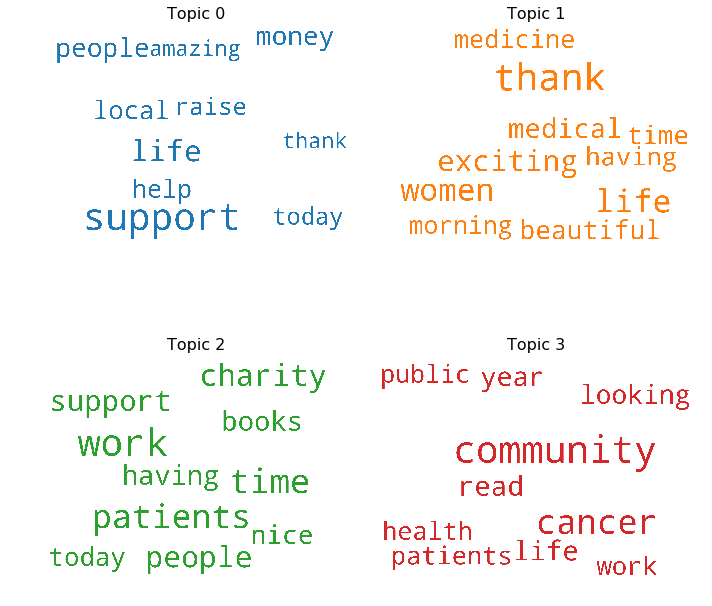

In [0]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

After manually evaluation the word clouds and associated tweets by two researchers, we got the top 3 topics on both consumer discussions and promotional information.

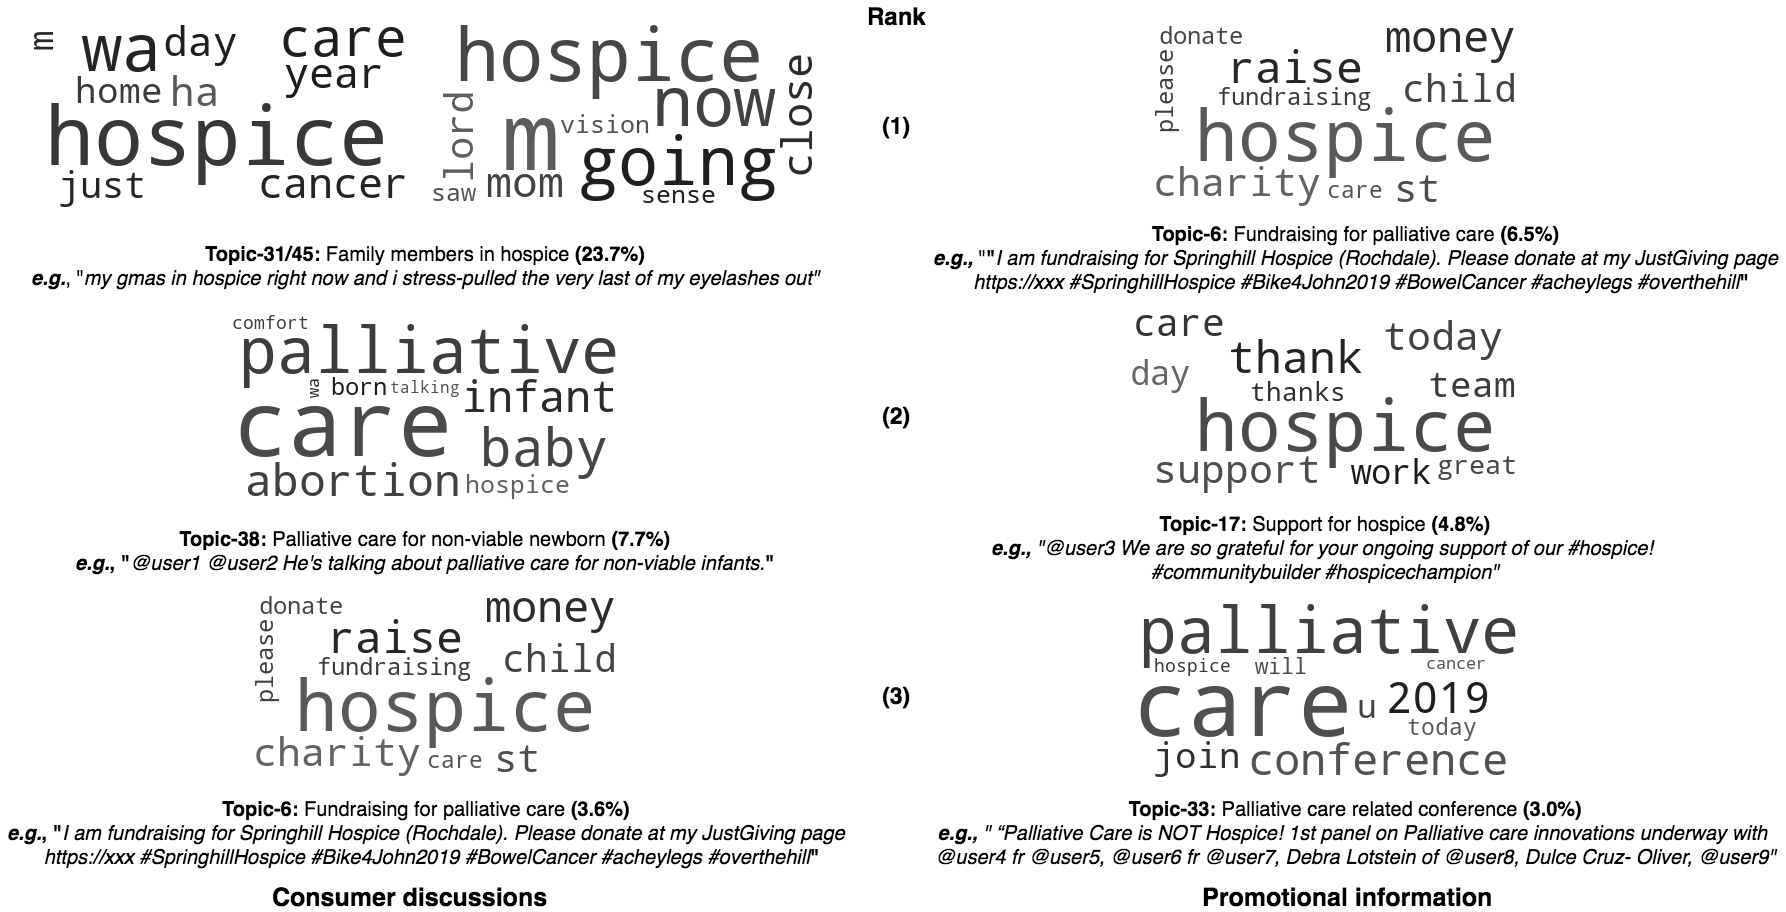

In [0]:
Image('tutorial_data/7_wordclouds.png', width=800)